## 0. Load libraries

In [11]:
# import libraries
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# Folium for mapping
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


## 1. Load data from Wiki

In [12]:
url="https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

r = requests.get(url, headers=header)

tables = pd.read_html(r.text)
tables

[               0                 1  \
 0    Postal code           Borough   
 1            M1A      Not assigned   
 2            M2A      Not assigned   
 3            M3A        North York   
 4            M4A        North York   
 5            M5A  Downtown Toronto   
 6            M6A        North York   
 7            M7A  Downtown Toronto   
 8            M8A      Not assigned   
 9            M9A         Etobicoke   
 10           M1B       Scarborough   
 11           M2B      Not assigned   
 12           M3B        North York   
 13           M4B         East York   
 14           M5B  Downtown Toronto   
 15           M6B        North York   
 16           M7B      Not assigned   
 17           M8B      Not assigned   
 18           M9B         Etobicoke   
 19           M1C       Scarborough   
 20           M2C      Not assigned   
 21           M3C        North York   
 22           M4C         East York   
 23           M5C  Downtown Toronto   
 24           M6C        

## 2. Clean data

In [13]:
df=pd.DataFrame(tables[0])

#1. The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood

df.columns=['Postcode','Borough','Neighbourhood']

df.drop([0],axis=0,inplace=True)

df.reset_index()

#2. Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.

df.drop(df[df['Borough']=="Not assigned"].index,axis=0, inplace=True)

#3. More than one neighborhood can exist in one postal code area. 
# For example, in the table on the Wikipedia page, 
# you will notice that M5A is listed twice and has two neighborhoods: 
# Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods 
# separated with a comma as shown in row 11 in the above table.

df1=df.groupby("Postcode").agg(lambda x:','.join(set(x)))

#4. If a cell has a borough but a Not assigned neighborhood, 
# then the neighborhood will be the same as the borough. 
# So for the 9th cell in the table on the Wikipedia page, 
# the value of the Borough and the Neighborhood columns will be Queen's Park.

df1.loc[df1['Neighbourhood']=="Not assigned",'Neighbourhood']=df1.loc[df1['Neighbourhood']=="Not assigned",'Borough']

df1.reset_index()

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,Malvern / Rouge
1,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek
2,M1E,Scarborough,Guildwood / Morningside / West Hill
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,Kennedy Park / Ionview / East Birchmount Park
7,M1L,Scarborough,Golden Mile / Clairlea / Oakridge
8,M1M,Scarborough,Cliffside / Cliffcrest / Scarborough Village West
9,M1N,Scarborough,Birch Cliff / Cliffside West


In [14]:
df1.reset_index().shape

(103, 3)

## 3. Get geo data

In [15]:
#get geo data from local drive (saved from link https://cocl.us/Geospatial_data)
geo_data=pd.read_csv("Geospatial_Coordinates.csv")
geo_data

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


## 3. Integrating postal

In [16]:
df1['Latitude']=geo_data['Latitude'].values
df1['Longitude']=geo_data['Longitude'].values

df2 = df1.reset_index()
df2

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,Malvern / Rouge,43.806686,-79.194353
1,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek,43.784535,-79.160497
2,M1E,Scarborough,Guildwood / Morningside / West Hill,43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,Kennedy Park / Ionview / East Birchmount Park,43.727929,-79.262029
7,M1L,Scarborough,Golden Mile / Clairlea / Oakridge,43.711112,-79.284577
8,M1M,Scarborough,Cliffside / Cliffcrest / Scarborough Village West,43.716316,-79.239476
9,M1N,Scarborough,Birch Cliff / Cliffside West,43.692657,-79.264848


In [17]:
df2.shape

(103, 5)

## 4. Visualizing

In [29]:
center_lat=df1.Latitude.mean()
center_long=df1.Longitude.mean()

toronto_map = folium.Map(location=[center_lat, center_long], zoom_start=13) # generate map centred around the Conrad Hotel

dff=df2
for lat, lng, borough, neighborhood in zip(dff.Latitude, dff.Longitude, dff.Borough, dff.Neighbourhood):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
            [lat, lng],
            radius=5,
            color='blue',
            popup=label,
            fill = True,
            fill_color='blue',
            fill_opacity=0.4
    ).add_to(toronto_map)
toronto_map

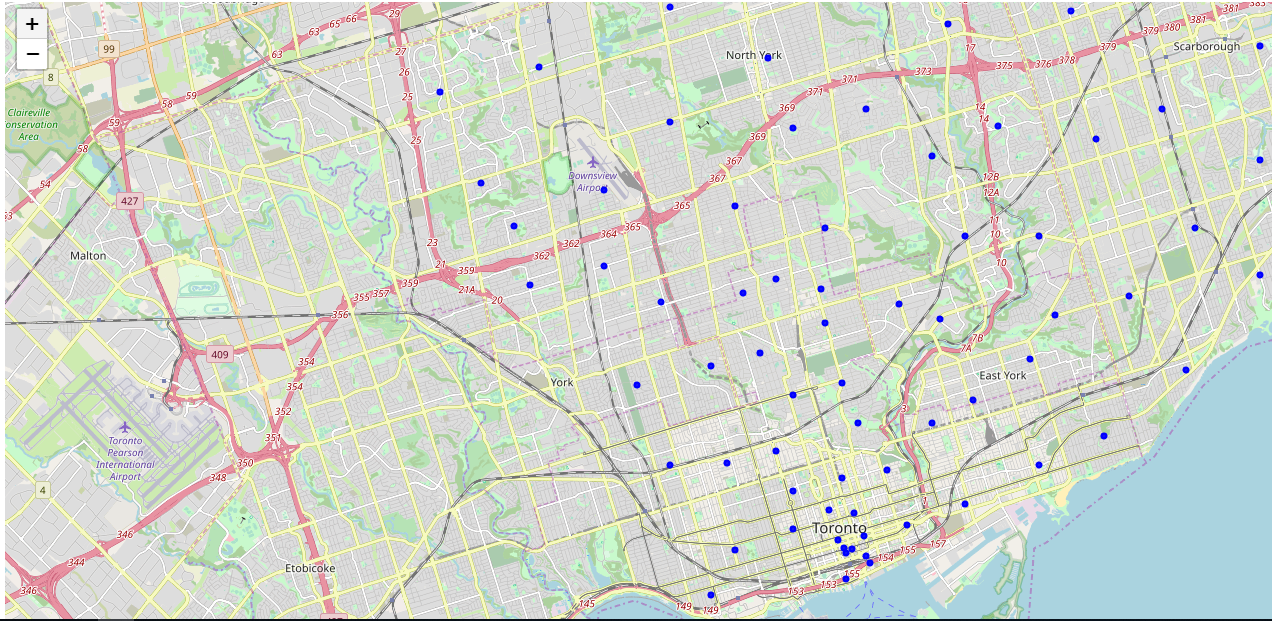

In [12]:
PATH = "C:/Users/lwchong/Documents/DataScience_education/Github_projects/Coursera_Capstone/"
Image(filename = PATH + "Toronto1.png", width=1000, height=600)

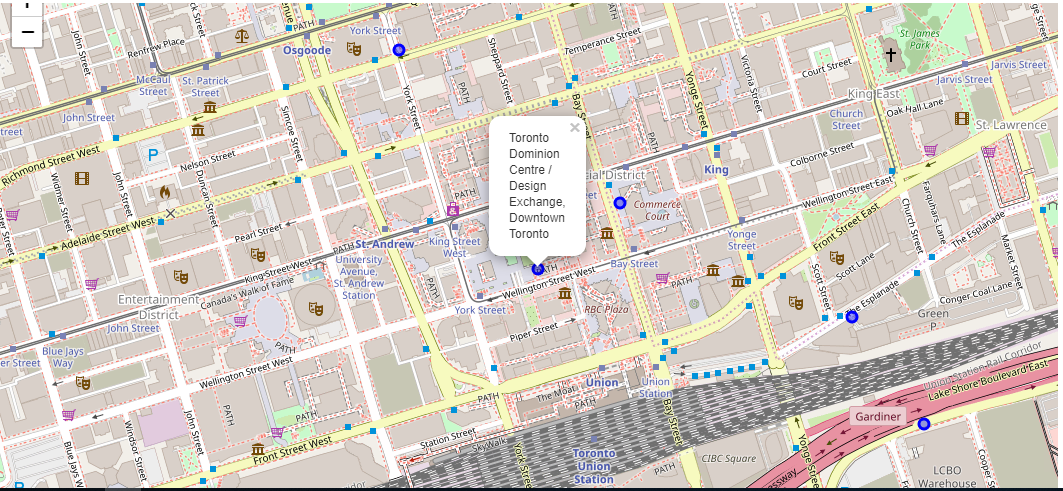

In [13]:
PATH = "C:/Users/lwchong/Documents/DataScience_education/Github_projects/Coursera_Capstone/"
Image(filename = PATH + "Toronto2.png", width=1000, height=600)

### As we can see from the map, the neighbourhood of Toronto city center is more densely populated